<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/CNN_Rock%2C_Paper%2C_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-08-18 13:04:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   131MB/s    in 1.5s    

2020-08-18 13:04:06 (131 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-08-18 13:04:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps

In [2]:
import os
import zipfile

In [3]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissor_dir = os.path.join('/tmp/rps/scissors')

In [6]:
rock_names = os.listdir(rock_dir)
print(rock_names[:10])

paper_names = os.listdir(paper_dir)
print(paper_names[:10])

scissor_names = os.listdir(scissor_dir)
print(scissor_names[:10])

['rock02-013.png', 'rock07-k03-015.png', 'rock07-k03-104.png', 'rock04-020.png', 'rock06ck02-094.png', 'rock03-061.png', 'rock03-025.png', 'rock04-051.png', 'rock07-k03-084.png', 'rock06ck02-085.png']
['paper05-068.png', 'paper07-033.png', 'paper06-067.png', 'paper07-047.png', 'paper02-064.png', 'paper06-065.png', 'paper05-092.png', 'paper02-089.png', 'paper05-049.png', 'paper01-061.png']
['testscissors01-072.png', 'testscissors01-037.png', 'scissors01-037.png', 'testscissors02-102.png', 'testscissors03-069.png', 'testscissors02-082.png', 'scissors03-019.png', 'testscissors01-086.png', 'testscissors01-097.png', 'testscissors02-056.png']


In [7]:
print('No. of rock training images: ', len(os.listdir(rock_dir)))
print('No. of paper training images: ', len(os.listdir(paper_dir)))
print('No. of scissor training images: ', len(os.listdir(scissor_dir)))

No. of rock training images:  840
No. of paper training images:  840
No. of scissor training images:  840


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/tmp/rps/',
    target_size = (150,150),
    batch_size = 126,
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.


In [10]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/rps-test-set',
    target_size = (150,150),
    batch_size = 126,
    class_mode = 'categorical'
)

Found 372 images belonging to 3 classes.


In [32]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 20,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 3
)

Epoch 1/15
20/20 [==============================] - 22s 1s/step - loss: 1.1673 - accuracy: 0.3679 - val_loss: 1.0978 - val_accuracy: 0.4435
Epoch 2/15
20/20 [==============================] - 21s 1s/step - loss: 1.0076 - accuracy: 0.4730 - val_loss: 0.8566 - val_accuracy: 0.5941
Epoch 3/15
20/20 [==============================] - 20s 1s/step - loss: 0.7474 - accuracy: 0.6635 - val_loss: 0.6632 - val_accuracy: 0.6882
Epoch 4/15
20/20 [==============================] - 20s 1s/step - loss: 0.5653 - accuracy: 0.7687 - val_loss: 0.4962 - val_accuracy: 0.8280
Epoch 5/15
20/20 [==============================] - 20s 1s/step - loss: 0.4170 - accuracy: 0.8345 - val_loss: 0.6683 - val_accuracy: 0.7016
Epoch 6/15
20/20 [==============================] - 20s 1s/step - loss: 0.3587 - accuracy: 0.8627 - val_loss: 0.4715 - val_accuracy: 0.8065
Epoch 7/15
20/20 [==============================] - 20s 1s/step - loss: 0.2720 - accuracy: 0.8968 - val_loss: 0.4061 - val_accuracy: 0.8280
Epoch 8/15
20/20 [==

In [36]:
import matplotlib.pyplot as plt

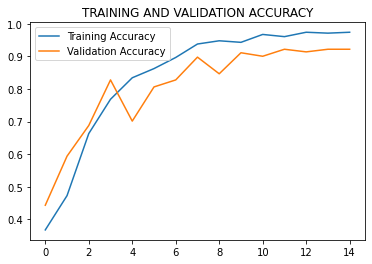

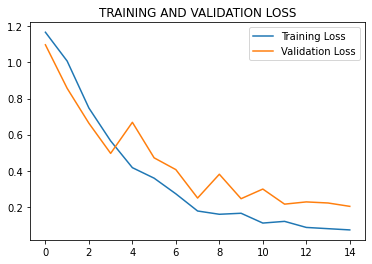

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.legend()

In [41]:
import numpy as np

In [43]:
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  print(classes)

Saving scissors1.png to scissors1.png
scissors1.png
[[0. 0. 1.]]
